In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import shap
from pdpbox import pdp
from alibi.explainers import CounterFactual
from lime import lime_tabular
import lime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence 
from sklearn.calibration import CalibratedClassifierCV
from alibi.explainers import CounterFactualProto
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import learning_curve
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [2]:
brainwave_df = pd.read_csv("emotions.csv")
brainwave_df.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b     label  
0       23.5     -215.0     280.00    -162.00    -162.00     280.00  NEGATIVE  
1      -23.3      182.0       2.57     -31.60     -31.60       2.57   NEUTRAL  
2      462.0     -267.0     281.00    -148.00    -148.00     281.00  POSITIVE  
3      299.0      132.0     -12.40       9.53       9.53     -12.40  POSITIVE  
4       12.0      119.0     -17.60      23.90      23.90     -17.60   NEUTRAL  

[5 rows x 2549 columns]

In [3]:
brainwave_df

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
0          4.620      30.3    -356.0     15.60      26.3       1.070   
1         28.800      33.1      32.0     25.80      22.8       6.550   
2          8.900      29.4    -416.0     16.70      23.7      79.900   
3         14.900      31.6    -143.0     19.80      24.3      -0.584   
4         28.300      31.3      45.2     27.30      24.5      34.800   
...          ...       ...       ...       ...       ...         ...   
2127      32.400      32.2      32.2     30.80      23.4       1.640   
2128      16.300      31.3    -284.0     14.30      23.9       4.200   
2129      -0.547      28.3    -259.0     15.80      26.7       9.080   
2130      16.800      19.9    -288.0      8.34      26.0       2.460   
2131      27.000      32.0      31.8     25.00      28.9       4.990   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  \
0          0.411     -15.700       2.060        3.15  ...      23.50   
1          1.680       2.880       3.830       -4.82  ...     -23.30   
2          3.360      90.200      89.900        2.03  ...     462.00   
3         -0.284       8.820       2.300       -1.97  ...     299.00   
4         -5.790       3.060      41.400        5.52  ...      12.00   
...          ...         ...         ...         ...  ...        ...   
2127      -2.030       0.647      -0.121       -1.10  ...     -21.70   
2128       1.090       4.460       4.720        6.63  ...     594.00   
2129       6.900      12.700       2.030        4.64  ...     370.00   
2130       1.580     -16.000       1.690        4.74  ...     124.00   
2131       1.950       6.210       3.490       -3.51  ...       1.95   

      fft_742_b  fft_743_b  fft_744_b  fft_745_b  fft_746_b  fft_747_b  \
0        20.300     20.300      23.50     -215.0     280.00    -162.00   
1       -21.800    -21.800     -23.30      182.0       2.57     -31.60   
2      -233.000   -233.000     462.00     -267.0     281.00    -148.00   
3      -243.000   -243.000     299.00      132.0     -12.40       9.53   
4        38.100     38.100      12.00      119.0     -17.60      23.90   
...         ...        ...        ...        ...        ...        ...   
2127      0.218      0.218     -21.70       95.2     -19.90      47.20   
2128   -324.000   -324.000     594.00      -35.5     142.00     -59.80   
2129   -160.000   -160.000     370.00      408.0    -169.00     -10.50   
2130    -27.600    -27.600     124.00     -656.0     552.00    -271.00   
2131      1.810      1.810       1.95      110.0      -6.71      22.80   

      fft_748_b  fft_749_b     label  
0       -162.00     280.00  NEGATIVE  
1        -31.60       2.57   NEUTRAL  
2       -148.00     281.00  POSITIVE  
3          9.53     -12.40  POSITIVE  
4         23.90     -17.60   NEUTRAL  
...         ...        ...       ...  
2127      47.20     -19.90   NEUTRAL  
2128     -59.80     142.00  POSITIVE  
2129     -10.50    -169.00  NEGATIVE  
2130    -271.00     552.00  NEGATIVE  
2131      22.80      -6.71   NEUTRAL  

[2132 rows x 2549 columns]

In [4]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [5]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

    return X_train, X_test, y_train, y_test

In [6]:
def plot_multiclass_ice(model, X, feature_index, class_index):
    x = X.values
    # Compute partial dependence for a range of values of the target feature
    feature_values = np.linspace(x[:, feature_index].min(), x[:, feature_index].max(), num=100)
    pd_results = []
    for row in x:
        X_sample = row.copy()
        ice_values = []
        for value in feature_values:
            X_sample[feature_index] = value
            ice_values.append(model.predict_proba([X_sample])[0][class_index])
        pd_results.append(ice_values)

    # Plot ICE curves
    for pd_result in pd_results:
        plt.plot(feature_values, pd_result, color='blue', alpha=0.1)

    plt.xlabel(X.columns[feature_index])
    plt.ylabel('Prediction probability for class {}'.format(class_index))
    plt.title('ICE plot')
    plt.show()

In [25]:
# 모델과 데이터를 전달받아 PDP, LIME, Counterfactual Explanations을 수행하 결과를 출력하는 함수를 정의합니다.
def model_explanations(model_name, model, pdpmodel, X_train, X_test, y_test, sorted_index_desc, index=0):
    X_train_df = pd.DataFrame(X_train, columns=X_columns_name)
    X_test_df = pd.DataFrame(X_test, columns=X_columns_name)
    print("ICE")
    if model_name == "SVM":
        plot_multiclass_ice(model, X_test_df, sorted_index_desc[0], 0)
        plot_multiclass_ice(model, X_test_df, sorted_index_desc[0], 1)
        plot_multiclass_ice(model, X_test_df, sorted_index_desc[0], 2)
    else:
        pdp_model = pdp.PDPIsolate(
            model=pdpmodel,
            df=X_test_df,
            model_features=X_test_df.columns.tolist(),
            feature=X_test_df.columns[sorted_index_desc[0]],
            feature_name=X_test_df.columns[sorted_index_desc[0]],
            n_classes=3
        )
        # Show the plot
        plt.show()
        fig, _ = pdp_model.plot(plot_lines=True)
        fig.show()
        X_test_df_d = X_test_df.drop('x', axis=1).copy()
        plot_multiclass_ice(model, X_test_df_d, sorted_index_desc[0], 0)
        plot_multiclass_ice(model, X_test_df_d, sorted_index_desc[0], 1)
        plot_multiclass_ice(model, X_test_df_d, sorted_index_desc[0], 2)
    
    print("LIME Explanations")
    explainer = lime_tabular.LimeTabularExplainer(
        training_data=X_train,
        feature_names=X_train_df.columns,
        class_names=['Negative', 'Neutral', 'Positive'],
        categorical_features=X_train_df.columns,
        mode='classification'
    )
    exp = explainer.explain_instance(
        data_row=X_train_df.iloc[100],
        predict_fn=model.predict_proba,
        num_samples=10000,
        num_features=15
    )
    exp.show_in_notebook(show_table=True, show_all=False)

#     print("Counterfactual Explanations")
#     counterfactual = CounterFactualProto(model.predict_proba, X_train_df.shape[1], C=100, optimizer="adam", tol=1e-5)
#     counterfactual_instance = counterfactual.explain(X_test_df.iloc[index].values.reshape(1, -1))
#     print("Original instance: ")
#     print("Target label: ", y_test.iloc[index])
#     print("Predicted label: ", np.argmax(model.predict(X_test_df.iloc[index].values.reshape(1, -1))))

#     # Print counterfactual instance
#     print("Counterfactual instance: ")
#     print("Counterfactual label: ", counterfactual_instance.cf['class'])

In [8]:
X_train, X_test, y_train, y_test = preprocess_inputs(brainwave_df)
X_columns_name = X_test.columns

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
def SVM():
    # LinearSVC
    svc = LinearSVC(max_iter=5000, C=0.005, penalty='l1', dual=False)
    svc.fit(X_train_scaled, y_train)
    svc_score = svc.score(X_test_scaled, y_test)

    # LinearSVC coefficients
    svc_coef = svc.coef_
    svc_coef_df = pd.DataFrame({'feature': X_train.columns, 'importance': svc_coef[0]})
    print("LinearSVC coefficients:")
    print(svc_coef_df)
    
    calibrated_svc = CalibratedClassifierCV(svc, cv='prefit')
    calibrated_svc.fit(X_train_scaled, y_train)
    calibrated_svc_score = calibrated_svc.score(X_test_scaled, y_test)
    
    return svc, calibrated_svc, svc_score, calibrated_svc_score, svc_coef_df

In [10]:
def RandomForest():
    # RandomForestClassifier
    rf = RandomForestClassifier(max_depth=5, min_samples_leaf=10)  # Limit the depth of the trees
    rf.fit(X_train_scaled, y_train)
    rf_score = rf.score(X_test_scaled, y_test)

    # RandomForest feature importance
    rf_importances = rf.feature_importances_
    rf_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': rf_importances})
    print("RandomForest feature importance:")
    print(rf_importance_df.sort_values('importance', ascending=False))

    return rf, rf_score, rf_importance_df


In [26]:
def XGBC():
    # XGBoost
    xgbc = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=20, subsample=0.4, 
                             reg_alpha=0.2, reg_lambda=10.0,
                             use_label_encoder=False, objective='multi:softprob', 
                             eval_metric='mlogloss', tree_method='gpu_hist')
    xgbc.fit(X_train_scaled, y_train)
    xgbc_score = xgbc.score(X_test_scaled, y_test)

    # XGBoost feature importance
    xgbc_importances = xgbc.feature_importances_
    xgbc_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': xgbc_importances})
    print("XGBoost feature importance:")
    print(xgbc_importance_df.sort_values('importance', ascending=False))
    return xgbc, xgbc_score, xgbc_importance_df

In [12]:
def sort_index(data):
    sorted_index_desc = sorted(range(len(data)), key=lambda i: data[i], reverse=True)
    return sorted_index_desc

In [13]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    print(classification_report(y_test, y_pred))

    # Calculate ROC-AUC
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    n_classes = y_test_bin.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    print(f"Micro-average ROC-AUC: {roc_auc['micro']}")

    # Precision, recall, F1 score
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Compute Precision-Recall and plot curve
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i],
                                                            y_proba[:, i])
        average_precision[i] = average_precision_score(y_test_bin[:, i], y_proba[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(),
        y_proba.ravel())
    average_precision["micro"] = average_precision_score(y_test_bin, y_proba,
                                                         average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))

In [14]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [15]:
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'][:15], y=fi_df['feature_names'][:15])
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [16]:
svc, calibrated_svc, svc_score, calibrated_svc_score, svc_coef_df = SVM()

LinearSVC coefficients:
         feature  importance
0     # mean_0_a         0.0
1       mean_1_a         0.0
2       mean_2_a         0.0
3       mean_3_a         0.0
4       mean_4_a         0.0
...          ...         ...
2543   fft_745_b         0.0
2544   fft_746_b         0.0
2545   fft_747_b         0.0
2546   fft_748_b         0.0
2547   fft_749_b         0.0

[2548 rows x 2 columns]


In [17]:
rf, rf_score, rf_importance_df = RandomForest()

RandomForest feature importance:
           feature  importance
1286   mean_d_2_b2    0.028286
3         mean_3_a    0.024648
175     min_q_15_a    0.019463
1277      mean_3_b    0.017523
1439     min_q_5_b    0.017227
...            ...         ...
1181     fft_657_a    0.000000
56     mean_d_46_a    0.000000
1178     fft_654_a    0.000000
1176     fft_652_a    0.000000
84    moments_14_a    0.000000

[2548 rows x 2 columns]


In [27]:
xgbc, xgbc_score, xgbc_importance_df = XGBC()

XGBoost feature importance:
          feature  importance
0      # mean_0_a    0.091987
307   covmat_97_a    0.074108
1276     mean_2_b    0.049073
2        mean_2_a    0.034024
1581  covmat_97_b    0.031513
...           ...         ...
900     fft_376_a    0.000000
901     fft_377_a    0.000000
902     fft_378_a    0.000000
903     fft_379_a    0.000000
2547    fft_749_b    0.000000

[2548 rows x 2 columns]


In [28]:
# 출력
print(f"SVM: {svc_score}")
print(f"SVM+Calibration: {calibrated_svc_score}")
print(f"Random Forest: {rf_score}")
print(f"Gradient Boosting: {xgbc_score}")

SVM: 0.8984375
SVM+Calibration: 0.9
Random Forest: 0.96875
Gradient Boosting: 0.9765625


In [29]:
evaluate_model(calibrated_svc, X_test_scaled, y_test)
evaluate_model(xgbc, X_test_scaled, y_test)
evaluate_model(rf, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       201
           1       0.98      0.97      0.98       231
           2       0.92      0.76      0.84       208

    accuracy                           0.90       640
   macro avg       0.90      0.90      0.90       640
weighted avg       0.91      0.90      0.90       640

Micro-average ROC-AUC: 0.9777026367187499
Precision: 0.9
Recall: 0.9
F1 Score: 0.9
Average precision score, micro-averaged over all classes: 0.96
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       201
           1       1.00      0.99      0.99       231
           2       0.97      0.96      0.96       208

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640

Micro-average ROC-AUC: 0.9987426757812501
Precision: 0.9765625
Recall: 0.9765625
F1 Score: 0

<module 'matplotlib.pyplot' from 'F:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

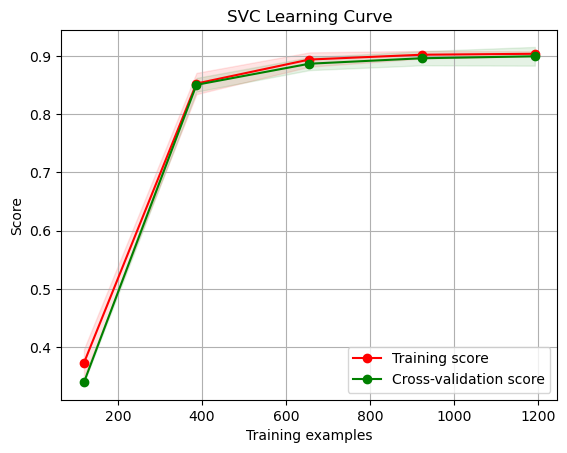

In [21]:
plot_learning_curve(svc, "SVC Learning Curve", X_train_scaled, y_train)

<module 'matplotlib.pyplot' from 'F:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

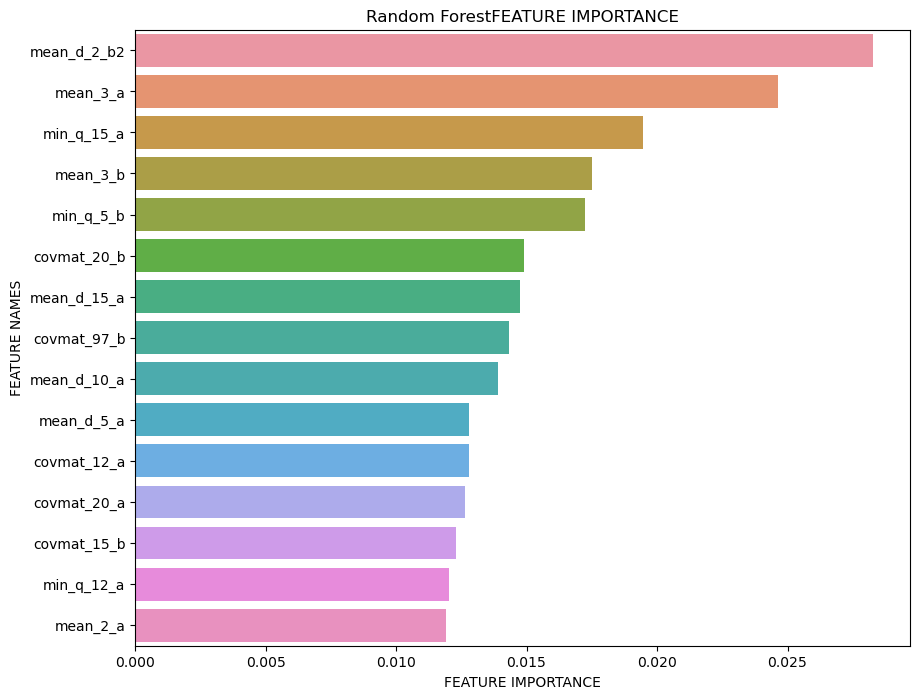

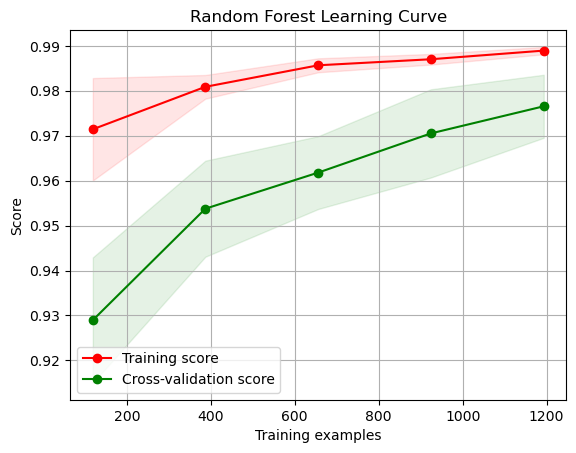

In [22]:
plot_feature_importance(rf.feature_importances_, X_train.columns, 'Random Forest')
plot_learning_curve(rf, "Random Forest Learning Curve", X_train_scaled, y_train)

<module 'matplotlib.pyplot' from 'F:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

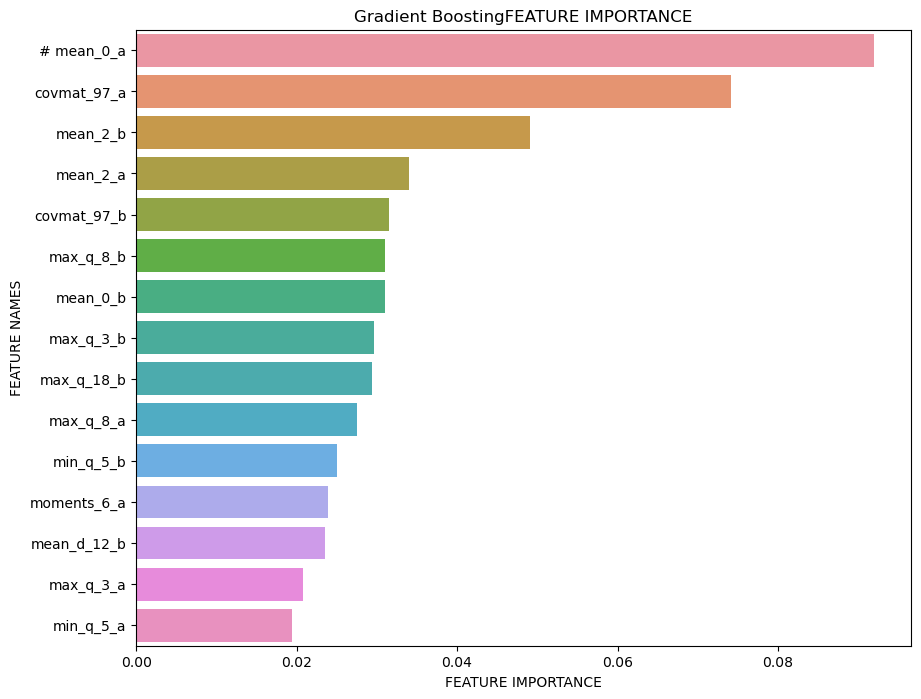

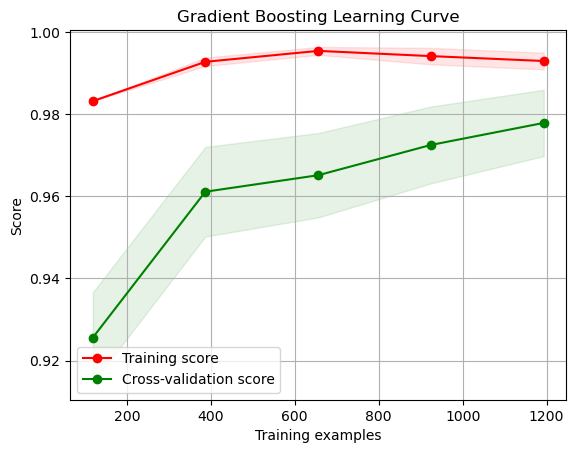

In [30]:
plot_feature_importance(xgbc.feature_importances_, X_train.columns, 'Gradient Boosting')
plot_learning_curve(xgbc, "Gradient Boosting Learning Curve", X_train_scaled, y_train)


SVM:
ICE


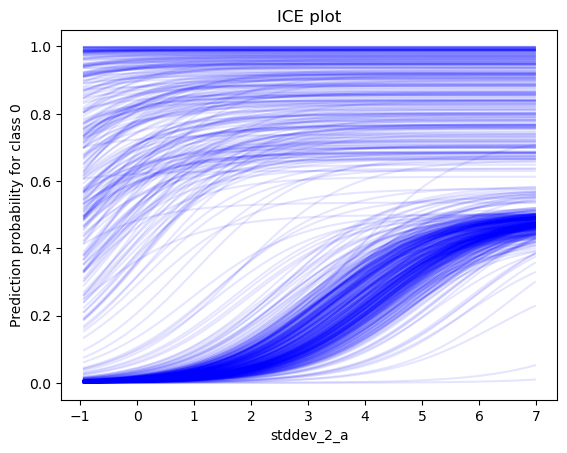

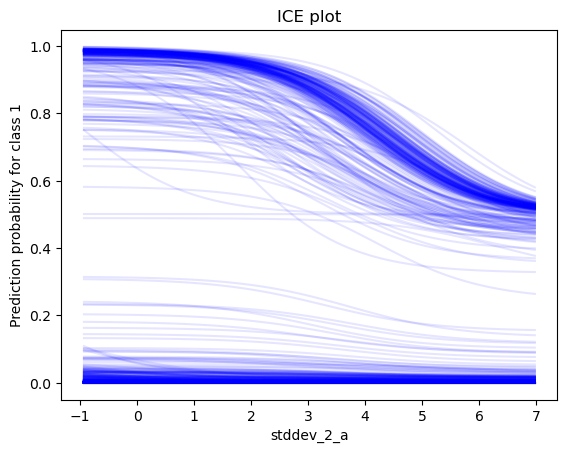

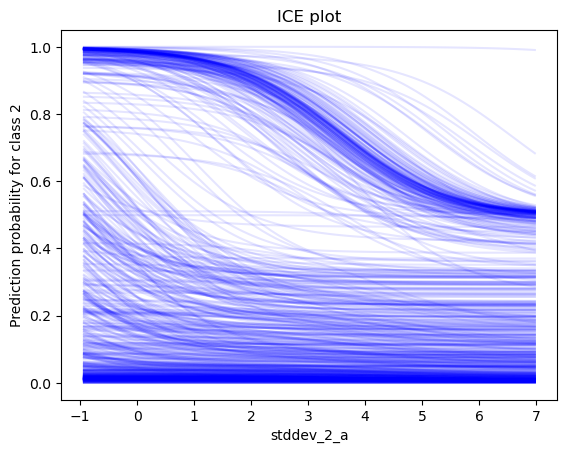

LIME Explanations



Random Forest:
ICE
obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
# 각 모델에 대해 설명 결과 출력
model_examples = [("SVM", calibrated_svc, svc, svc_coef_df), ("Random Forest", rf, rf, rf_importance_df), ("Gradient Boosting", xgbc, xgbc, xgbc_importance_df)]
#model_examples = [("Random Forest", rf, rf, rf_importance_df), ("Gradient Boosting", xgbc, xgbc, xgbc_importance_df)]

for model_name, model, pdpmodel, coef in model_examples:
    print(f"\n{model_name}:")
    sorted_index_desc = sort_index(coef['importance'])
    model_explanations(model_name, model, pdpmodel, X_train_scaled, X_test_scaled, y_test, sorted_index_desc)